## Importing Libraries

In [78]:
%matplotlib inline 

import os
import numpy as np
import pandas as pd
import quandl
import glob

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)

In [79]:
#API configuration

API_KEY = 'VsPJfDEFmdcJCX--41xq'
quandl.ApiConfig.api_key = API_KEY

In [80]:
#pulling data from quandl

df_AVBLS  = quandl.get("BCHAIN/AVBLS", start_date="2011-09-13", end_date="2021-04-11") 
df_MKPRU = quandl.get("BCHAIN/MKPRU", start_date="2011-09-13", end_date="2021-04-11")
df_MWNTD = quandl.get("BCHAIN/MWNTD", start_date="2011-09-13", end_date="2021-04-11")
df_MWNUS = quandl.get("BCHAIN/MWNUS", start_date="2011-09-13", end_date="2021-04-11")
df_NADDU = quandl.get("BCHAIN/NADDU", start_date="2011-09-13", end_date="2021-04-11")
df_NTRAN = quandl.get("BCHAIN/NTRAN", start_date="2011-09-13", end_date="2021-04-11")
df_NTRAT = quandl.get("BCHAIN/NTRAT", start_date="2011-09-13", end_date="2021-04-11")
df_NTRBL = quandl.get("BCHAIN/NTRBL", start_date="2011-09-13", end_date="2021-04-11")
df_TRVOU = quandl.get("BCHAIN/TRVOU", start_date="2011-09-13", end_date="2021-04-11")



In [83]:
#saving DataFrames as csv for further use

df_AVBLS.to_csv('df_AVBLS.csv')
df_MKPRU.to_csv('df_MKPRU.csv')
df_MWNTD.to_csv('df_MWNTD.csv')
df_MWNUS.to_csv('df_MWNUS.csv')
df_NADDU.to_csv('df_NADDU.csv')
df_NTRAN.to_csv('df_NTRAN.csv')
df_NTRAT.to_csv('df_NTRAT.csv')
df_NTRBL.to_csv('df_NTRBL.csv')
df_TRVOU.to_csv('df_TRVOU.csv')


In [84]:
#importing collected datasets and merging into single dataframe

filenames = list(glob.glob("*.csv"))
file = filenames[0]

BTC_df = pd.read_csv(file, parse_dates=['Date'], index_col='Date')
BTC_df.columns = [BTC_df.columns[0]+"_"+file[-9:-4]]
for file in filenames[1:]:
    load = pd.read_csv(file, parse_dates=['Date'], index_col='Date')
    load.columns = [load.columns[0]+"_"+file[-9:-4]]
    BTC_df = pd.merge(BTC_df, load, left_index=True, right_index=True)

print(BTC_df.info())
print(BTC_df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3442 entries, 2011-09-13 to 2021-04-09
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Value_AVBLS  3442 non-null   float64
 1   Value_MKPRU  3442 non-null   float64
 2   Value_MWNTD  3442 non-null   float64
 3   Value_MWNUS  3442 non-null   float64
 4   Value_NADDU  3442 non-null   float64
 5   Value_NTRAN  3442 non-null   float64
 6   Value_NTRAT  3442 non-null   float64
 7   Value_NTRBL  3442 non-null   float64
 8   Value_TRVOU  3442 non-null   float64
dtypes: float64(9)
memory usage: 268.9 KB
None
            Value_AVBLS  Value_MKPRU  Value_MWNTD  Value_MWNUS  Value_NADDU  \
Date                                                                          
2011-09-13     0.019009        5.990          0.0          2.0      13152.0   
2011-09-14     0.016134        6.190          0.0          2.0      12408.0   
2011-09-15     0.020901        5.230          0.0  

Data Dictionary:


BCHAIN-AVBLS - average block size

BCHAIN-MKPRU - BTC Market Price USD

BCHAIN-MWNTD - Number of transactions made by My Wallet Users per day.

BCHAIN-MWNUS - Number of wallets hosts using our My Wallet Service.

BCHAIN-NADDU - Number of unique bitcoin addresses used per day.

BCHAIN-NTRAN - Total number of unique bitcoin transactions per day.

BCHAIN-NTRAT - Total number of unique bitcoin transactions per day (cumulative).

BCHAIN-NTRBL - The average number of transactions per block.

BCHAIN-TRVOU - Data showing the USD trade volume from the top exchanges.



In [85]:
#getting a baseline of statistical descriptors of each series
BTC_df.describe()

,Value_AVBLS,Value_MKPRU,Value_MWNTD,Value_MWNUS,Value_NADDU,Value_NTRAN,Value_NTRAT,Value_NTRBL,Value_TRVOU
count,3442.000000,3442.000000,3442.000000,3.442000e+03,3.442000e+03,3442.000000,3.442000e+03,3442.000000,3.442000e+03
mean,0.640645,4579.801894,49353.634224,1.691275e+07,3.431151e+05,179015.005230,2.046688e+08,1204.015196,1.704536e+08
std,0.432824,8602.337176,34419.852626,1.951307e+07,2.380139e+05,118139.290354,1.951711e+08,810.038417,3.573485e+08
min,0.012902,2.290000,0.000000,2.000000e+00,7.701000e+03,4523.000000,1.497195e+06,30.000000,0.000000e+00
25%,0.186040,231.972500,16958.250000,1.096661e+06,1.269448e+05,61056.750000,3.136158e+07,366.250000,2.247758e+06
50%,0.710282,643.325000,51794.000000,7.427467e+06,3.806670e+05,194740.000000,1.323536e+08,1261.931667,1.932927e+07
75%,1.004553,6937.040000,73168.000000,2.966501e+07,5.300535e+05,286785.000000,3.520133e+08,1973.049011,1.773977e+08
max,1.455319,61258.730000,144971.000000,7.118714e+07,1.072861e+06,490644.000000,6.323104e+08,2762.540984,5.352016e+09


In [86]:
BTC_df.to_csv("merged_data.csv")

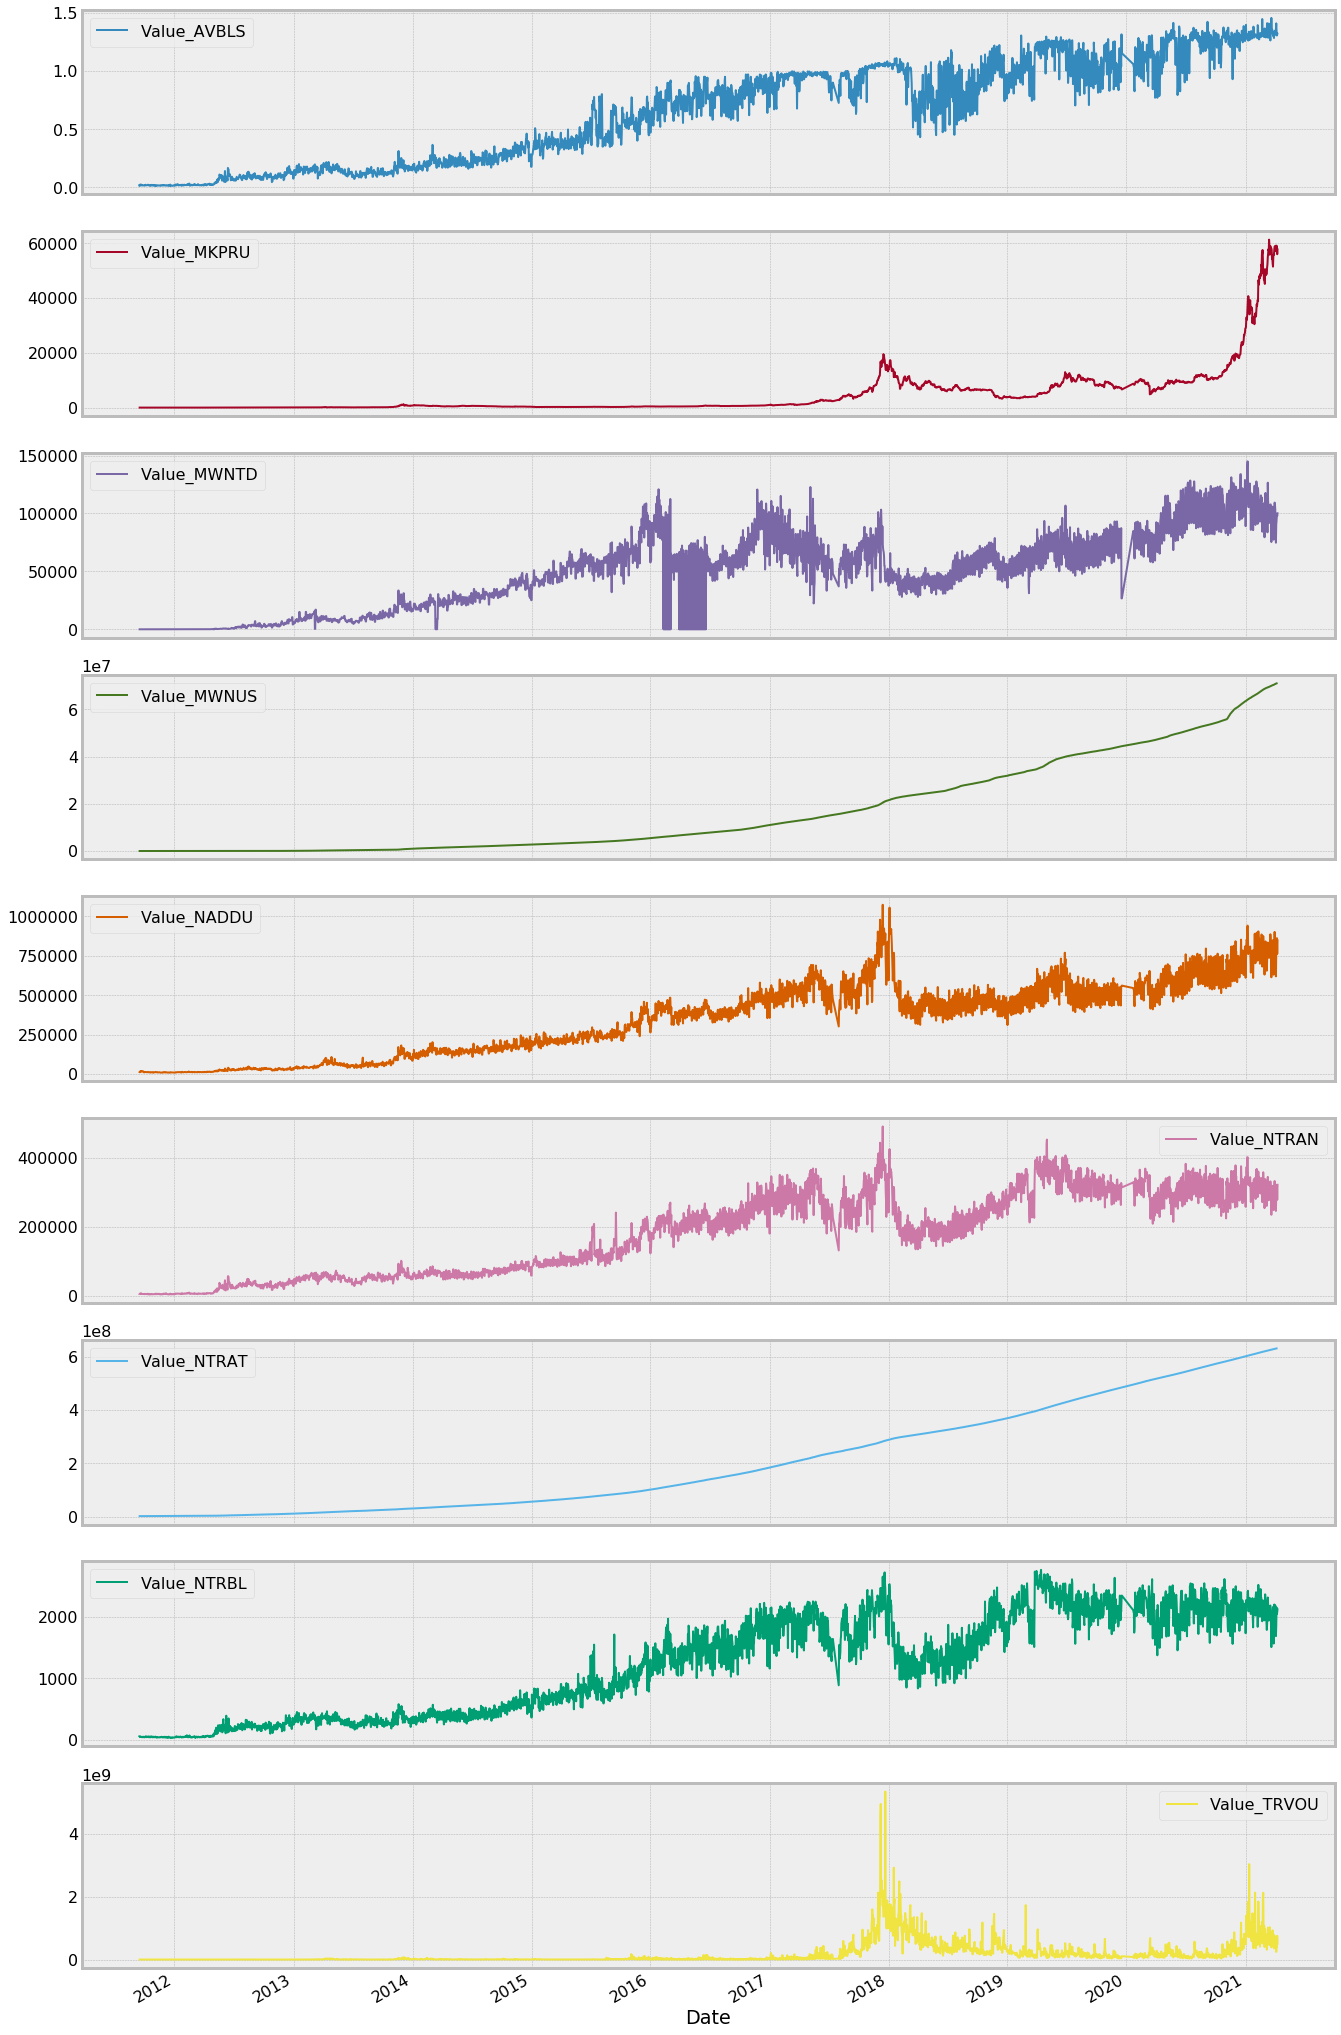

In [87]:
#plotting the compiled dataframe for visual inspection and interpretation

import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
plt.style.use('bmh')

font = {'family' : 'sans-serif',
        'weight' : 'medium',
        'size'   : 16}

matplotlib.rc('font', **font)

BTC_df.plot(subplots=True, figsize=(20,40))
plt.show()

 <b>Initial Observations</b>

With few exceptions, most data begins to see accelerated grwoth in 2012, which can be considered as the birth of bitcoin. 2017 was a year of increased volatility, which was followed with the first half of 2021.However, even witht he increasit volatility in 2021, Trading volume on exchanges has not caught the one in 2017-2018 peak. Also we have "0" values in the "Number of wallets using the My Wallet Services(MWNUS). This is most probably due to bad data or data outages. That is why, to have more coherent data, let's backfill the instances where data is 0.

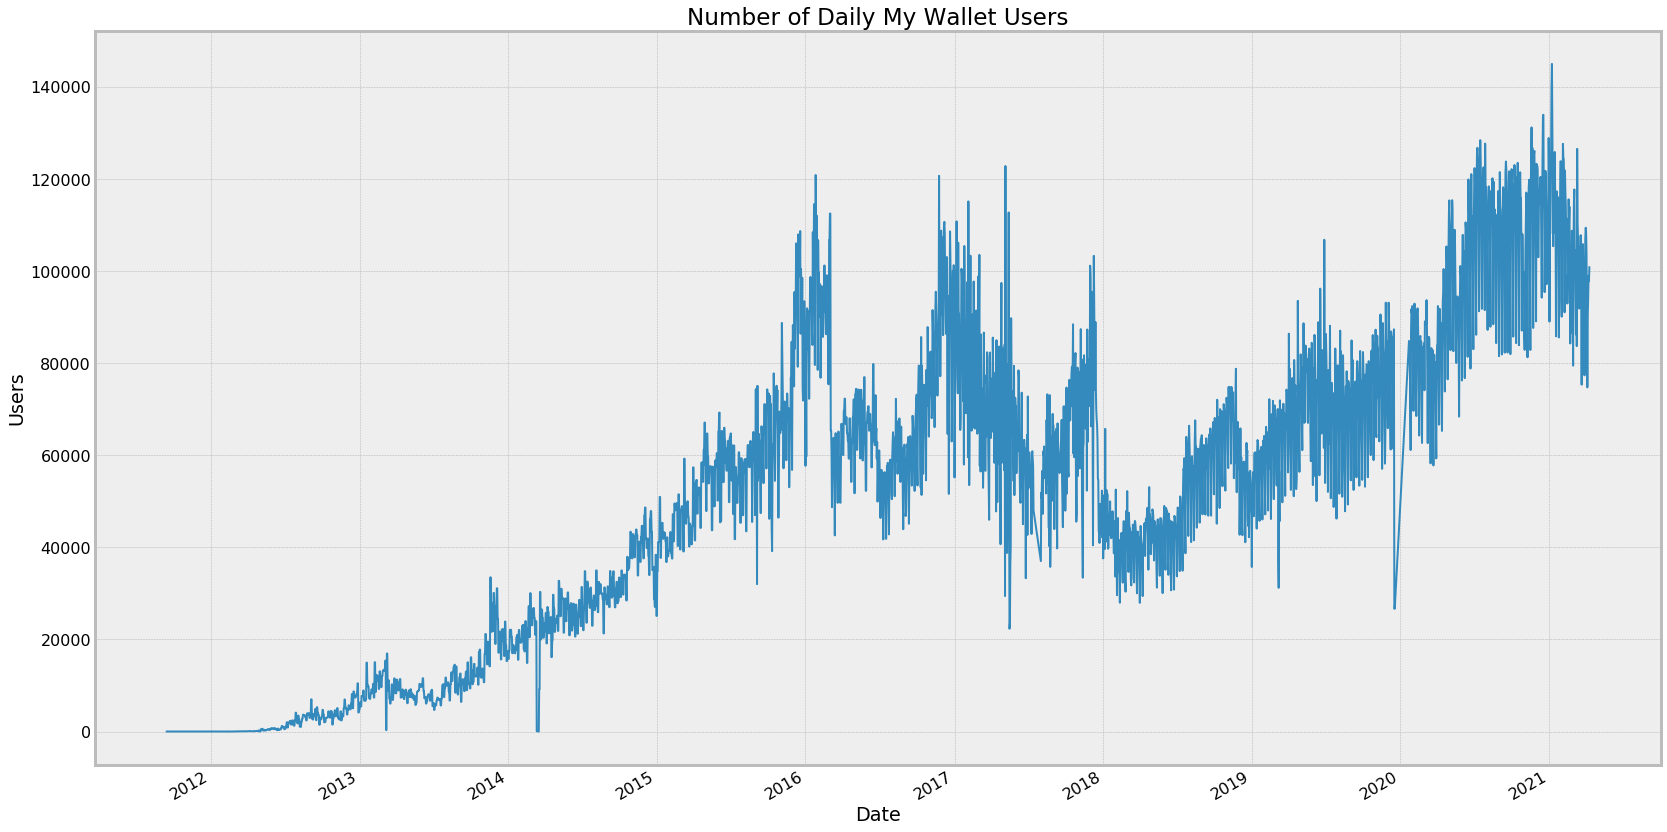

In [88]:
BTC_df['Value_MWNTD'].replace(to_replace=0, method="bfill", inplace=True)

# check our results
BTC_df['Value_MWNTD'].plot(subplots=True, figsize=(25,15))
plt.title('Number of Daily My Wallet Users')
plt.ylabel('Users')
plt.show()

<b>Exploration 1) Historical Trend of Average Number of Bitcoin per Transaction</b>

My objective with this exploration is determine: if Bitcoin is increasingly being adopted as currency/means of exchange, if Bitcoin is increasingly becoming a "storage of value" or speculative investment, and if we have already reached second "peak Bitcoin". 1st peak was at 2018.



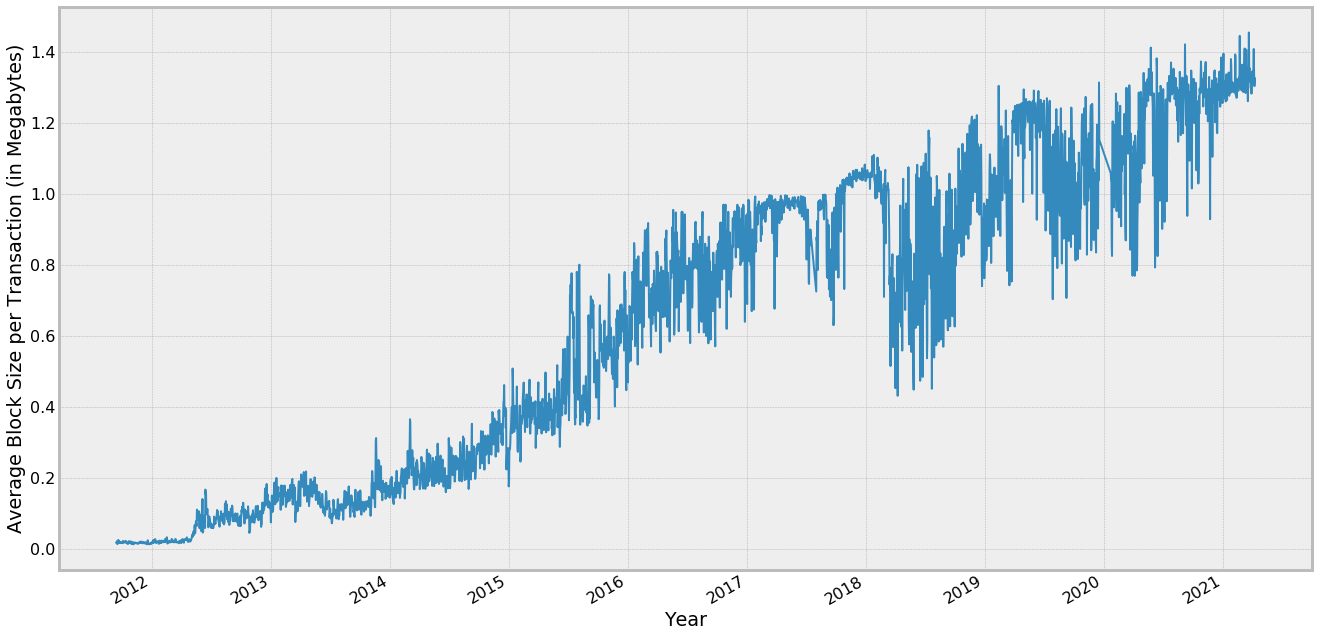

In [89]:
# further analysis of Average Size of the Blocks added to the chain, a good proxy of BTC transactions. 

plt.rcParams['figure.figsize'] = (20,11.5)
BTC_df['Value_AVBLS'].plot()
plt.xlabel('Year')
plt.ylabel('Average Block Size per Transaction (in Megabytes)')
plt.show()
#AVG Block Size is 1.4, system is maxed at around 2MB (See Segregated Witness (SegWit) protocol upgrade) 
#This refers to the data size of the block sent to the chain
#If block size has been at max for a long amount of time, This either means the market
#is highly liquid and has enough market participants. 
#Based on this we can say Market is getting more liquid since the last quarter of 2020.. 

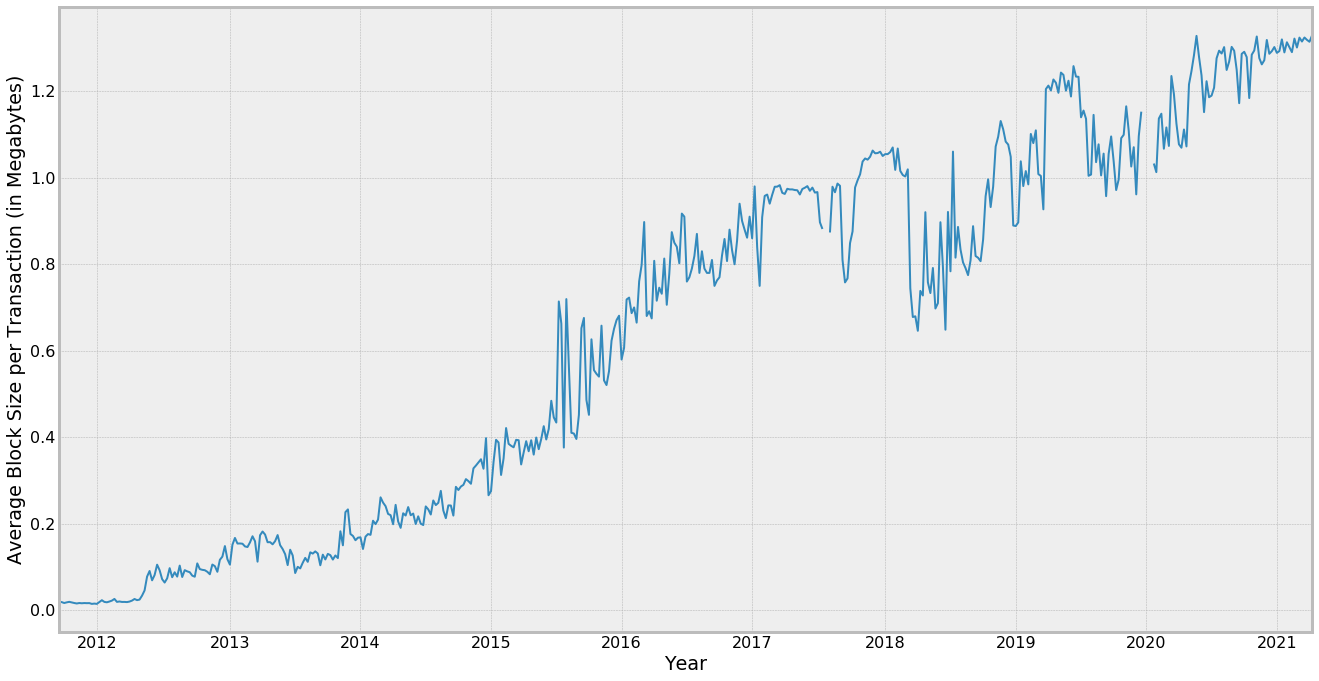

In [90]:
# resampling on weekly basis to clean up the plot

BTC_df['Value_AVBLS'].resample('W').median().plot()
plt.xlabel('Year')
plt.ylabel('Average Block Size per Transaction (in Megabytes)')
plt.show()

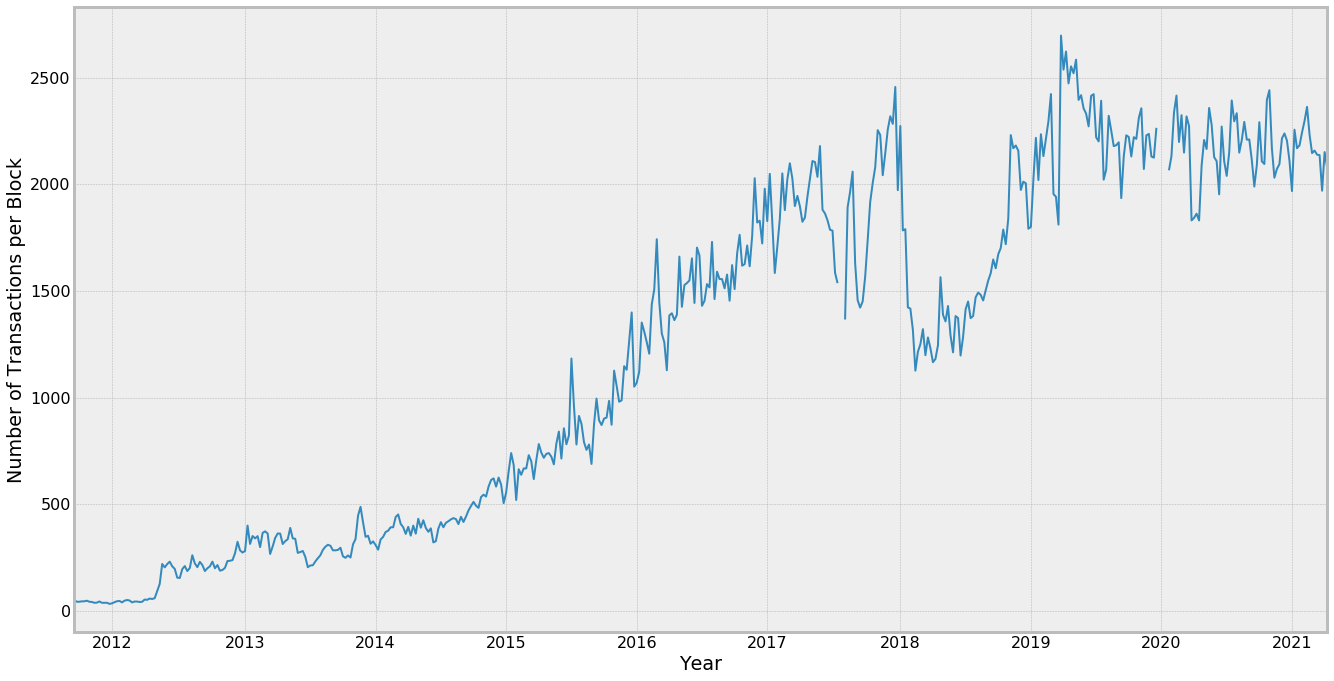

In [91]:
# examining the Number of Transactions per block added to the chain to further drive the above point home

BTC_df['Value_NTRBL'].resample('W').median().plot()
plt.xlabel('Year')
plt.ylabel('Number of Transactions per Block')
plt.show()

Though the number of transactions in each block (added to the chain) is trending higher since 2011, we see a bit of a drop off in mid-2017, mid 2018 and March 2020, this may be explain by the meteoric rise in the price of BTC. That is, few transactions are needed to move an equivalent amount of value. (Will need to plot against BTC price to see this relationship)

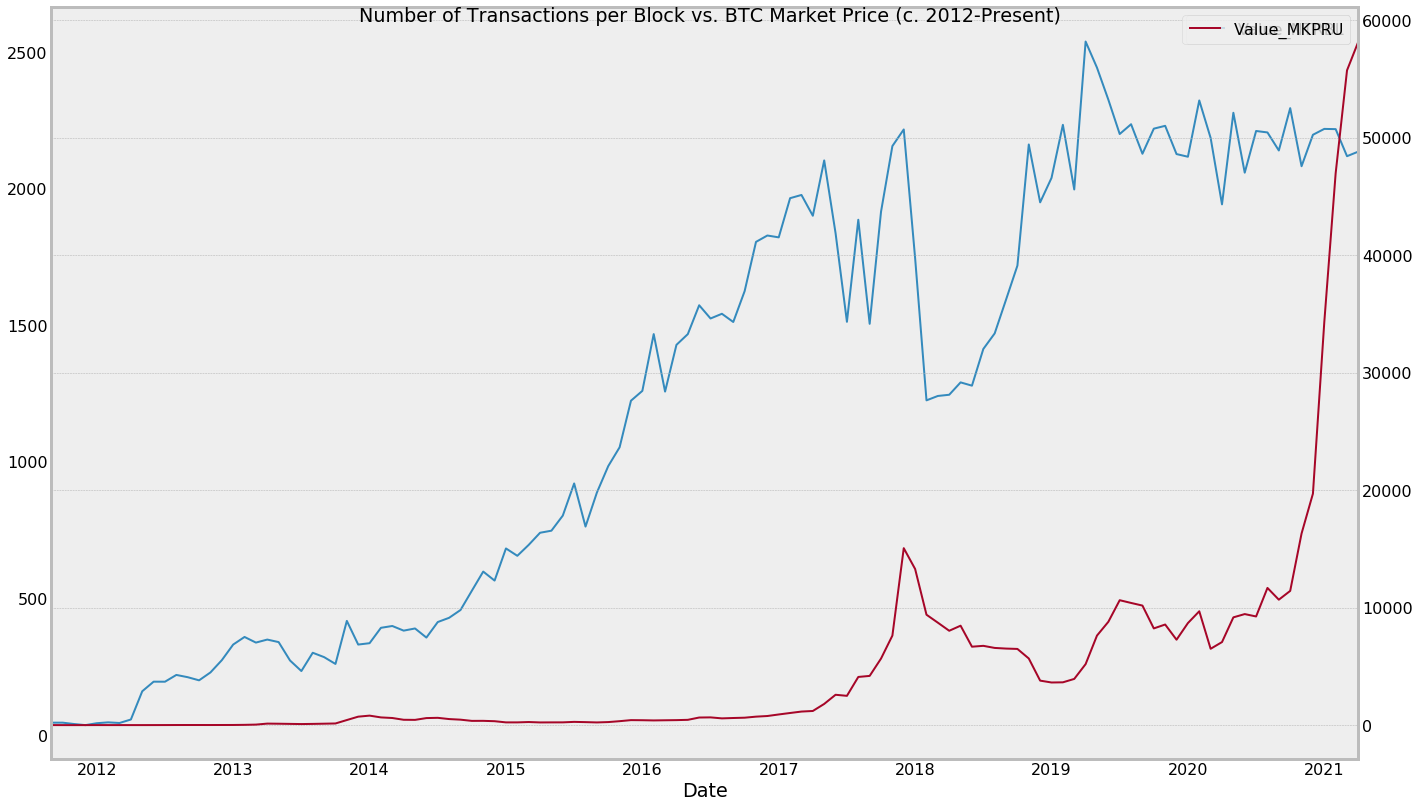

In [94]:
# looking at a comparison of Number of Transactions per block and the coin's market price (post-2012 
# and resampled on a MONTHLY basis)

_ = BTC_df['Value_NTRBL'].resample('M').median().plot()
_ = plt.legend()
_ = BTC_df['Value_MKPRU'].resample('M').median().plot(secondary_y=True)
_ = plt.suptitle('Number of Transactions per Block vs. BTC Market Price (c. 2012-Present)')
_ = plt.tight_layout()
_ = plt.legend()
plt.show()

If we are seeking evidence that Bitcoin is increasingly being adopted as a currency, I expected to see a negative correlation between BTC market price and transactions per block (in other words, as the price of BTC increases, fewer transactions are needed). However, we see that the number of transactions does reach an inflection point around Q1 2017 as the price of BTC doubles and triples from pre-2017 prices.

Then something interesting happens, it seems the rising market price of BTC attracts more participants (and thus more transactions) into the market.

Let's see if we can reinforce this notion with determining the number of BTC per transaction...